<a href="https://colab.research.google.com/github/vitorpohlenz/AudioAnalisysML/blob/segmentation/AudioClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone and install from github.

Cloning repository to have data in local folder.

In [1]:
!git clone https://github.com/vitorpohlenz/AudioAnalisysML.git

Cloning into 'AudioAnalisysML'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


[pyAudioAnalysis](https://github.com/tyiannak/pyAudioAnalysis)

In [2]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git
!pip install -r pyAudioAnalysis/requirements.txt
!pip install -e pyAudioAnalysis

Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 2575, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 2575 (delta 18), reused 8 (delta 3), pack-reused 2534
Receiving objects: 100% (2575/2575), 156.05 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (1579/1579), done.
     |████████████████████████████████| 13.1 MB 44 kB/s 
     |████████████████████████████████| 81 kB 10.8 MB/s 
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
     |████████████████████████████████| 146 kB 59.3 MB/s 
     |████████████████████████████████| 145 kB 45.1 MB/s 
     |████████████████████████████████| 6.8 MB 38.8 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 7.1 MB 54.2 MB/s 
  Created wheel for simplejson: filename=simplejson-3.16.0-cp37-cp37m-linux_x86_64.whl size=114890 sha256=64701771ea9b4013215e5e9409e4bf39d76b179b50721dd66c5887afde523efc
  Stored in director

Obtaining file:///content/pyAudioAnalysis
  Running setup.py develop for pyAudioAnalysis


# Libraries

In [1]:
# Common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import os

# Audio libraries
# import pyAudioAnalysis
from pyAudioAnalysis import audioSegmentation
from pyAudioAnalysis import audioBasicIO as aIO

# Signal processing libraries
from scipy.signal import find_peaks

# Set seed
seed = 9
np.random.seed(seed)

Dark theme better visualization.

In [2]:
# Plot's Layout
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize = [12,8])

import matplotlib.pyplot as plt

plt.style.use('ggplot')


# Functions

In [3]:
def RMS(array):
    """
    RMS value from 1D array.

    Parameters
    ----------
    array : numpy.array (1D numeric)
        Array to get rms value.

    Returns
    -------
    rms : float
        Valor RMS.

    """
    rms = np.sqrt(np.mean(np.power(array,2)))
    return rms

# Audio Segmentation

In [4]:
wavPath = 'AudioAnalisysML/data/aluminumBaseballBatPings.wav'

In [5]:
# sample frequency, samples(quantizied)
[fs, x] = aIO.read_audio_file(wavPath)
RMS(x)

68.01532232106516

In [6]:
# audioSegmentation.silence_removal(signal=x, 
#                                   sampling_rate=fs, st_win= 0.020,st_step =  0.020, smooth_window = 1.0, weight = 0.3, plot = True)

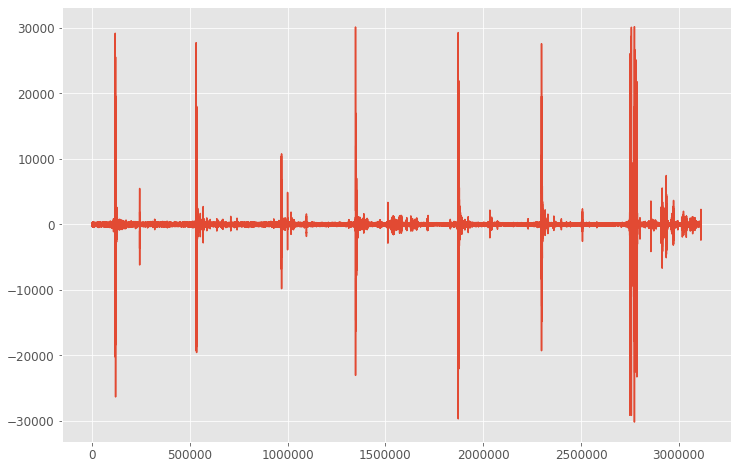

In [7]:
# Raw signal
plt.plot(x)

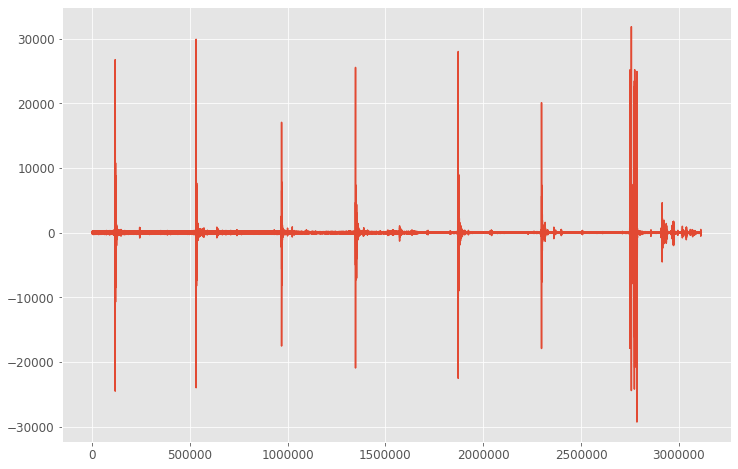

In [8]:
# Diff of signal
plt.plot(x[1:]-x[:-1])

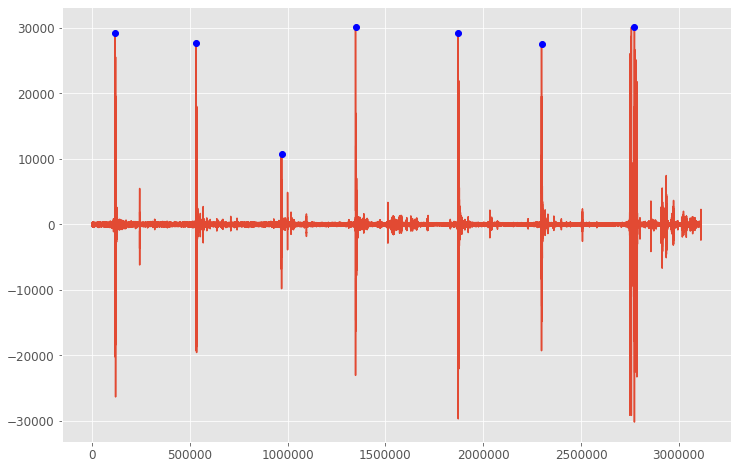

In [10]:
# Rule of thumb to find peaks
peaks, _ = find_peaks(x, height= 2*RMS(x)**2 ,distance=2*fs)
plt.plot(x)
plt.plot(peaks, x[peaks], "bo")
plt.show()

In [9]:
# Gerar samples (com o mesmo tamanho)